## Week 2 HW Linear Basis Regression

남승지

In [77]:
import numpy as np; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Exploratory Data Analysis

데이터 읽어주기

In [78]:
real = pd.read_csv('real.csv', index_col=0) 
real.columns = ['date','house_age','dist_mrt','no_cvs','lat','long','price']
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
No,,,,,,,
1,2012.917,32.0,84.879,10,24.983,121.540,37.9
2,2012.917,19.5,306.595,9,24.980,121.540,42.2
3,2013.583,13.3,561.985,5,24.987,121.544,47.3
4,2013.500,13.3,561.985,5,24.987,121.544,54.8
5,2012.833,5.0,390.568,5,24.979,121.542,43.1
6,2012.667,7.1,2175.030,3,24.963,121.513,32.1
7,2012.667,34.5,623.473,7,24.979,121.536,40.3
8,2013.417,20.3,287.603,6,24.980,121.542,46.7
9,2013.500,31.7,5512.038,1,24.951,121.485,18.8


NA 있는지 확인

In [79]:
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
date         414 non-null float64
house_age    414 non-null float64
dist_mrt     414 non-null float64
no_cvs       414 non-null int64
lat          414 non-null float64
long         414 non-null float64
price        414 non-null float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


거래가 기준으로 정렬

In [80]:
real.sort_values(by=['price'], inplace=True) 
# by = " " 정렬한 기준 변수
# inplace = True 는 Dataframe 자체를 정렬해서 저장 
real.reset_index(inplace=True) # inplace: replace the original dataset
real = real.drop(['No'], axis=1)
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
0,2013.333,14.8,393.261,6,24.962,121.538,7.6
1,2013.583,17.4,6488.021,1,24.957,121.474,11.2
2,2012.750,16.0,4066.587,0,24.943,121.503,11.6
3,2013.000,30.9,6396.283,1,24.944,121.479,12.2
4,2013.083,32.0,1156.777,0,24.949,121.530,12.8
5,2013.000,16.5,4082.015,0,24.942,121.504,12.8
6,2012.750,16.1,4066.587,0,24.943,121.503,12.9
7,2013.000,13.6,4197.349,0,24.939,121.504,13.0
8,2012.667,29.4,4510.359,1,24.949,121.495,13.2
9,2013.417,24.2,4605.749,0,24.947,121.496,13.4


거래가 outlier 지워주기

In [81]:
real.describe()

,date,house_age,dist_mrt,no_cvs,lat,long,price
count,414.000,414.000,414.000,414.000,414.000,414.000,414.000
mean,2013.149,17.713,1083.886,4.094,24.969,121.533,37.980
std,0.282,11.392,1262.110,2.946,0.012,0.015,13.606
min,2012.667,0.000,23.383,0.000,24.932,121.474,7.600
25%,2012.917,9.025,289.325,1.000,24.963,121.528,27.700
50%,2013.167,16.100,492.231,4.000,24.971,121.539,38.450
75%,2013.417,28.150,1454.279,6.000,24.977,121.543,46.600
max,2013.583,43.800,6488.021,10.000,25.015,121.566,117.500


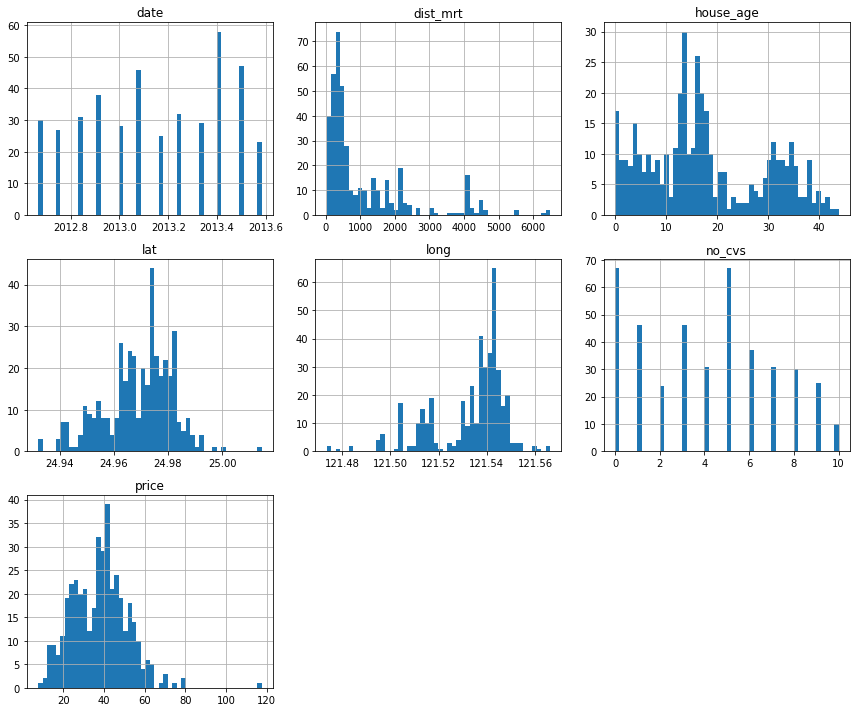

In [82]:
real.hist(bins=50, figsize=(12,10))
plt.tight_layout()

In [83]:
np.percentile(real.price, 99.5)

77.71400000000001

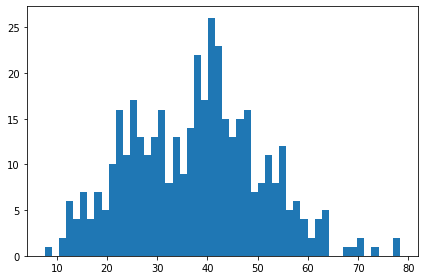

In [84]:
real = real[real.price < 80]
plt.hist(real.price, bins=50)
plt.tight_layout()

변수 간의 관계를 보면서 변환 해야할까 결정하기

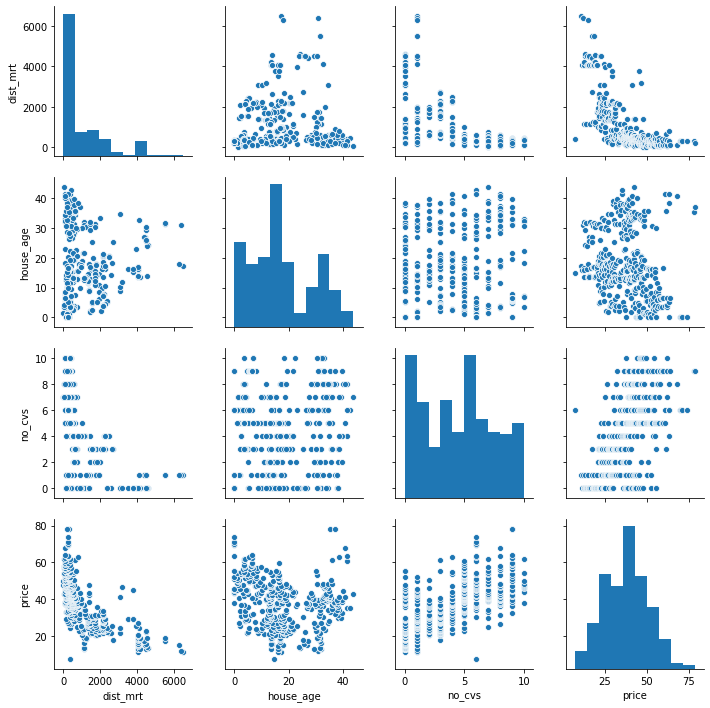

In [85]:
sns.pairplot(real[['dist_mrt', 'house_age','no_cvs','price']])

`dist_mrt` 변수가 skew 가 심하므로 log를 취해주자


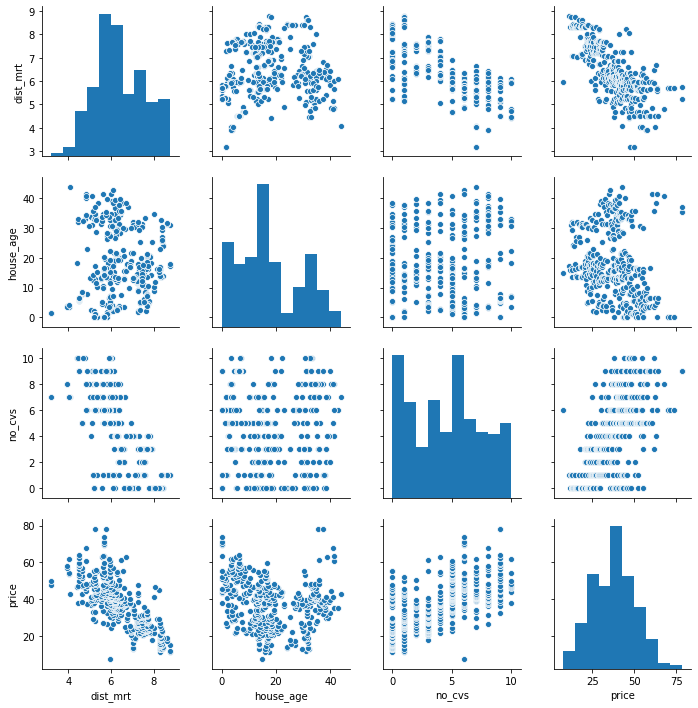

In [86]:
real2 = real.copy()
real2['dist_mrt'] = np.log(1+real.dist_mrt) # to prevent inf
sns.pairplot(real2[['dist_mrt', 'house_age','no_cvs','price']])

`dist_mrt` 변수가 종모양이 되었고, 다른 변수와의 관계도 대략 선형관계처럼 보인다. 

### 1. test set 추출

In [87]:
N = real.shape[0]

In [88]:
X = pd.DataFrame(real[["house_age", "dist_mrt", "no_cvs"]])
# drop axis의 경우 column 이면 1, row 이면 0
Y = pd.DataFrame(real['price'])

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 730)

In [91]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [92]:
Y_train = Y_train['price'].tolist()
Y_test = Y_test['price'].tolist()

### 2. Feature Extraction

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [94]:
from sklearn.linear_model import LinearRegression

degree를 2차랑 3차일때 test set으로 mse 를 계산해보자

In [95]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.fit_transform(X_test)
X_train_poly2.shape

(289, 10)

In [96]:
lin2 = LinearRegression(fit_intercept= False)
lin2.fit(X_train_poly2, Y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [97]:
mean_squared_error(Y_test,lin2.predict(X_test_poly2))

54.48471170385281

In [98]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.fit_transform(X_test)
X_train_poly3.shape

(289, 20)

In [99]:
lin3 = LinearRegression(fit_intercept= False)
lin3.fit(X_train_poly3, Y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [100]:
mean_squared_error(Y_test,lin3.predict(X_test_poly3))

52.21031734292783

degree가 3차일때보다 2차일때 mse 가 작다. degree = 2로 모델을 만들어보자

### 3. Ridge, Lasso Regression

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

linear regression

In [131]:
lin = LinearRegression()
lin.fit(X_train_poly2, Y_train)
pre_lin_train = lin.predict(X_train_poly2)
pre_lin_test = lin.predict(X_test_poly2)
lin_trainmse = mean_squared_error(Y_train, pre_lin_train)
lin_testmse = mean_squared_error(Y_test, pre_lin_test)
print(lin_trainmse); print(lin_testmse)

57.284827384230745
54.48471170329826


Ridge Regression

In [114]:
alphas = [0.1, 0.5, 1, 10]

In [129]:
rdg_trainmse = []
rdg_testmse = []
for i in alphas :
    rdg = Ridge(alpha = i, normalize = True)
    rdg.fit(X_train_poly2, Y_train)
    pre_rdg_train = rdg.predict(X_train_poly2)
    pre_rdg_test = rdg.predict(X_test_poly2)
    rdg_trainmse.append(mean_squared_error(Y_train, pre_rdg_train))
    rdg_testmse.append(mean_squared_error(Y_test, pre_rdg_test))
print(rdg_trainmse); print(rdg_testmse)

[66.09672784503408, 74.92405101771047, 80.61884352573372, 134.36273226033614]
[58.126335353761185, 63.50523026015101, 66.11851768347249, 101.62960524608135]


Lasso Regression

In [125]:
las_trainmse = []
las_testmse = []
for i in alphas :
    las = Lasso(alpha = i, normalize = True)
    las.fit(X_train_poly2, Y_train)
    pre_las_train = las.predict(X_train_poly2)
    pre_las_test = las.predict(X_test_poly2)
    las_trainmse.append(mean_squared_error(Y_train, pre_las_train))
    las_testmse.append(mean_squared_error(Y_test, pre_las_test))
print(las_trainmse); print(las_testmse)

[76.46926360117074, 164.87435380696505, 183.02819075442102, 183.02819075442102]
[63.573831329720655, 125.51714321850399, 139.1495779697669, 139.1495779697669]


mse 비교

In [132]:
print(lin_trainmse); print(lin_testmse)
print(rdg_trainmse); print(rdg_testmse)
print(las_trainmse); print(las_testmse)

57.284827384230745
54.48471170329826
[66.09672784503408, 74.92405101771047, 80.61884352573372, 134.36273226033614]
[58.126335353761185, 63.50523026015101, 66.11851768347249, 101.62960524608135]
[76.46926360117074, 164.87435380696505, 183.02819075442102, 183.02819075442102]
[63.573831329720655, 125.51714321850399, 139.1495779697669, 139.1495779697669]


계수 비교 (alpha = 0.1)

In [136]:
print(lin.coef_)
rid1 = Ridge(alpha= 0.1, normalize = True)
rid1.fit(X_train_poly2, Y_train)
print(rid1.coef_)
las1= Lasso(alpha = 0.1, normalize = True)
las1.fit(X_train_poly2, Y_train)
print(las1.coef_)

[ 0.000e+00 -1.099e+00 -8.058e-03  3.138e+00  1.725e-02  1.041e-04
  1.575e-02  5.959e-07 -1.273e-03 -1.908e-01]
[ 0.000e+00 -3.576e-01 -3.879e-03  1.581e+00  3.236e-03 -8.544e-06
 -1.724e-03  3.079e-08 -1.050e-03  2.837e-02]
[ 0.000e+00 -1.249e-01 -4.091e-03  1.249e+00 -0.000e+00 -0.000e+00
 -0.000e+00 -0.000e+00 -2.877e-04  0.000e+00]


### 4. k- fold CV sampling

In [147]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

In [105]:
print(X_train_poly2.shape)
print(X_test_poly2.shape)

(289, 10)
(124, 10)


In [138]:
alphas = np.logspace(-6 ,6, 500)

In [150]:
rdgcv = RidgeCV(alphas = alphas, normalize= True,cv = 5)
rdgcv.fit(X_train_poly2,Y_train)
rdg_alpha_best = rdgcv.alpha_
rdg_alpha_best

0.0032435608072358115

ridge 알파계수는 0

In [151]:
lascv = LassoCV(alphas = alphas, normalize = True, cv =5)
lascv.fit(X_train_poly2, Y_train)
las_alpha_best = lascv.alpha_
las_alpha_best

1e-06

In [155]:
rdg = Ridge(alpha = rdg_alpha_best, normalize = True)
rdg.fit(X_train_poly2, Y_train)
pre_rdg_train = rdg.predict(X_train_poly2)
pre_rdg_test = rdg.predict(X_test_poly2)
print(mean_squared_error(Y_train, pre_rdg_train))
rdg_best_testmse = mean_squared_error(Y_test, pre_rdg_test)
print(rdg_best_testmse)

57.384076112941415
53.951084455899824


In [156]:
las = Lasso(alpha = las_alpha_best, normalize = True)
las.fit(X_train_poly2, Y_train)
pre_las_train = las.predict(X_train_poly2)
pre_las_test = las.predict(X_test_poly2)
print(mean_squared_error(Y_train, pre_las_train))
las_best_testmse = mean_squared_error(Y_test, pre_las_test)
print(las_best_testmse)

57.28482744168397
54.48410481566425


In [157]:
print(lin_testmse); print(rdg_best_testmse); print(las_best_testmse)

54.48471170329826
53.951084455899824
54.48410481566425


### 5. test mse 보고, 어떤 feature 선택 

In [158]:
print(lin_testmse); print(rdg_best_testmse); print(las_best_testmse)

54.48471170329826
53.951084455899824
54.48410481566425


2차로 fitting 했을 때, ridge regression model의 test mse가 가장 작지만, ridge, lasso, linear regression 세가지 모두 test mse가 비슷하여, penalty 없이 linear regression model을 써도 될 것 같다. 